# Example1
**This is example 1. In this example, we build a Gaussian process regression surrogate model without transition learning. We then check the validity of its contribution. The test data is evaluated using the R2 indicator.**

First, we define the formulas to be covered by the surrogate model. For simplicity, we assume that the equation consists of a sin function and a linear function.

In [1]:
import numpy as np

def target_function(x1, x2):
    return np.sin(x1) + 0.001*x2 

Next, input points are sampled and we create training data.

In [21]:
import TL_GPRSM.utils.sampling as sampling

train_x = sampling.latin_hypercube_sampling(10, 2, False)
train_x = sampling.uniform_scaling(train_x, scale_mins=np.array([-np.pi, -np.pi]), scale_maxs=np.array([np.pi, np.pi]))
train_y = target_function(train_x[:,0], train_x[:,1])[:,np.newaxis]
print(train_x.shape, train_y.shape)

(10, 2) (10, 1)


GPR surrogate model is constructed and trained.

In [22]:
import TL_GPRSM.models.GPRSM as GPRSM
gprsm = GPRSM(train_x, train_y, kernel_name="Matern52", is_ard=True)
gprsm.optimize(max_iter=1e4, num_restarts=5)

Optimization restart 1/5, f = 0.23685040920414835
Optimization restart 2/5, f = 0.23685085608053136
Optimization restart 3/5, f = 0.23686404141560313
Optimization restart 4/5, f = 0.236850099616551
Optimization restart 5/5, f = 0.23686213350079122


Check the ARD contribution. I think you can see the contribution of x2 is very small.

In [23]:
ard_contribution = gprsm.get_ard_contribution()
print(ard_contribution)

[9.99992393e+01 7.60716883e-04]


Create test data and predict data by GPRSM.

In [24]:
test_x = sampling.latin_hypercube_sampling(10000, 2, False)
test_x = sampling.uniform_scaling(test_x, scale_mins=np.array([-np.pi, -np.pi]), scale_maxs=np.array([np.pi, np.pi]))
test_y = target_function(test_x[:,0], test_x[:,1])[:,np.newaxis]
predict_mean, predict_var = gprsm.predict(test_x)

Evaluate predicted values with r2 index.

In [25]:
import TL_GPRSM.utils.metrics as metrics

r2_index = metrics.r2_index(test_y, predict_mean)
print(r2_index)

0.9998653442867246


Plot the predicted values with matplotlib.

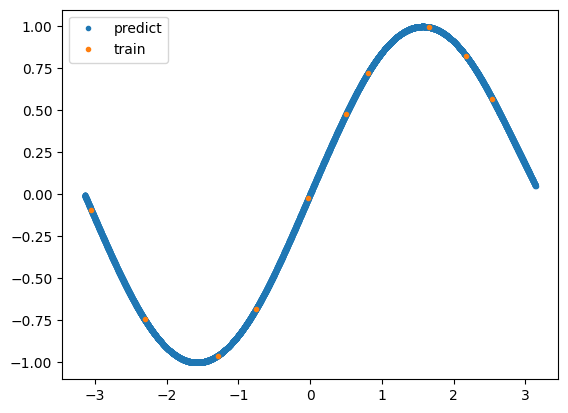

In [26]:
import matplotlib.pyplot as plt

plt.plot(test_x[:,0], predict_mean, ".", label="predict")
plt.plot(train_x[:,0], train_y, ".", label="train")
plt.legend()
plt.show()